<a href="https://colab.research.google.com/github/LEAF-BoiseState/GEOS-212-Python-Intro/blob/main/MyFirstNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import and install required libraries

Required libraries for this example are:
* nwis - need this to access USGS discharge
* matplotlib.pyplot - need this for plotting
* numpy - needed for statistics, etc.



In [ ]:
!pip install nwis

     |████████████████████████████████| 317kB 7.6MB/s 
     |████████████████████████████████| 4.7MB 13.0MB/s 
     |████████████████████████████████| 1.1MB 53.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 747kB 47.6MB/s 
     |████████████████████████████████| 727kB 40.1MB/s 
  Created wheel for black: filename=black-20.8b1-cp37-none-any.whl size=124184 sha256=3eeccdee67208c065cc69add283412513598f31dad158bfb5c6f68e43d3c8f46
  Stored in directory: /root/.cache/pip/wheels/6e/10/b5/edf7359c2edd0305cce7e3f96e07daf7ce55dceac9d3ce3373
Successfully built black
  Created wheel for bmipy: filename=bmipy-2.0-cp37-none-any.whl size=7246 sha256=67e757ae4dc8d2b53608ade1a623912f2c5072de23d5b401b492fc9ec7fb0764
  Stored in directory: /root/.cache/pip/wheels/2a/da/33/d583e2ee2116eb9167c44497f70b6c4a77508e6f8578d156eb
Successfully built bmipy
  Found existing installation: reg

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from nwis import Nwis 


# 2. Get USGS Discharge for a Specific Gage

In [ ]:
site_id = '13185000' # Boise River at Twin Springs
my_start = '2015-10-01' # First day of Water Year 2016
my_end = '2020-09-30' # Last day of Water Year 2020

In [ ]:
# Get data from NWIS
nwis_data = Nwis()
ds = nwis_data.get_data(site=site_id, start_date=my_start, end_date=my_end, data_type='dv')


# 3. Explore and Plot The Data

In [ ]:
ds

<xarray.Dataset>
Dimensions:   (datetime: 1827)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2015-10-01 2015-10-02 ... 2020-09-30
Data variables:
    00060     (datetime) float64 301.0 314.0 313.0 318.0 ... 377.0 372.0 364.0
Attributes:
    site_name:         BOISE RIVER NR TWIN SPRINGS ID
    site_code:         13185000
    site_latitude:     43.66805556
    site_longitude:    -115.72527779999999
    site_altitude:     3340
    site_coord_datum:  NAD83

In [ ]:
dates = ds['datetime'].values
Qcfs = ds['00060'].values

In [ ]:
Qcfs[0:9]

array([301., 314., 313., 318., 313., 306., 302., 303., 301.])

In [ ]:
dates[0:9]

array(['2015-10-01T00:00:00.000000000', '2015-10-02T00:00:00.000000000',
       '2015-10-03T00:00:00.000000000', '2015-10-04T00:00:00.000000000',
       '2015-10-05T00:00:00.000000000', '2015-10-06T00:00:00.000000000',
       '2015-10-07T00:00:00.000000000', '2015-10-08T00:00:00.000000000',
       '2015-10-09T00:00:00.000000000'], dtype='datetime64[ns]')

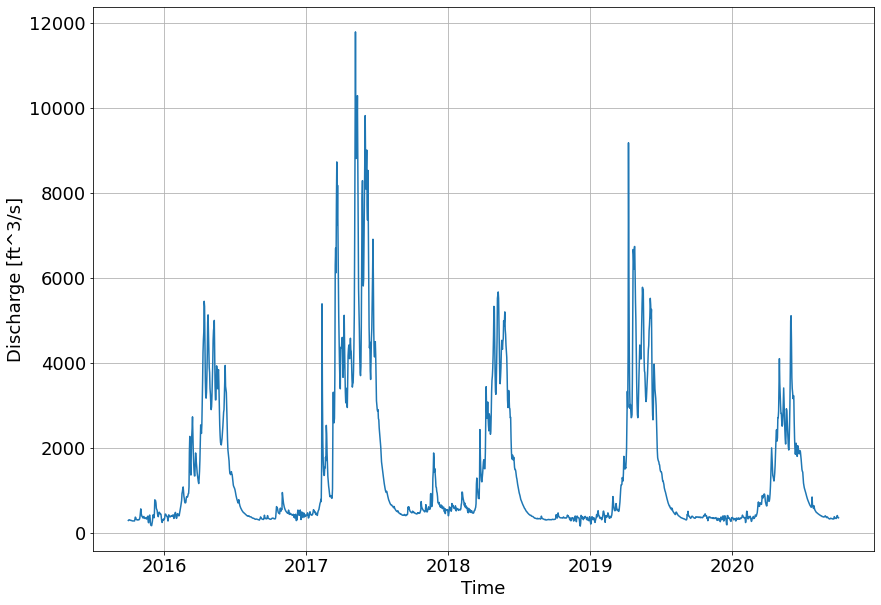

In [ ]:
plt.figure(figsize=(14,10))
plt.rcParams.update({'font.size': 18})
plt.plot(dates, Qcfs)
plt.xlabel('Time')
plt.ylabel('Discharge [ft^3/s]')
plt.grid()